In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf

In [2]:
path = r"D:\普众数据分析\快三彩票分析\最近5000期数据.xlsx"

In [3]:
data = pd.read_excel(path)

In [4]:
data.head()

,序号,期号,号码,和值,大小,奇偶
0,0,20200418021,156,12,大,偶
1,1,20200418022,445,13,大,奇
2,2,20200418023,344,11,大,奇
3,3,20200418024,245,11,大,奇
4,4,20200418025,235,10,小,偶


In [5]:
data.set_index('序号', inplace=True)

## 和值预测

In [6]:
data['和值'].tail(100).iplot(mode='lines+markers', size=6,theme='white')

In [7]:
X = data.index.values
y = data[['和值']].values

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [9]:
pipe = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

In [10]:
pipe.fit(X.reshape(-1,1), y.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [11]:
poly_pred = pipe.predict(X.reshape(-1,1))

In [12]:
sorted_zip = sorted(zip(X, poly_pred))
x_poly, poly_pred = zip(* sorted_zip)

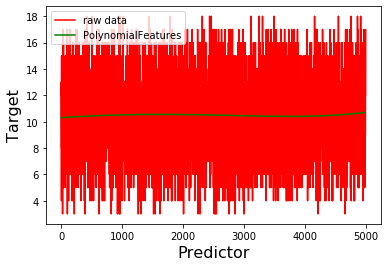

In [13]:
# plt.plot(X, y_pred, color ='r', label ='Linear Regression')
plt.plot(data.index, data['和值'], color='r', label ='raw data')
plt.plot(x_poly, poly_pred,  color ='g', label ='PolynomialFeatures')
plt.xlabel('Predictor', fontsize = 16)
plt.ylabel('Target', fontsize = 16)
plt.legend()
plt.show()


## 大小分析

长度为3

In [14]:
l_3 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index:
        l_3.append(s['大小']+'-'+data.loc[t+1, '大小']+'-'+data.loc[t+2, '大小'])

In [15]:
pd.Series(l_3).value_counts(normalize=True)

大-大-小    0.127651
小-大-大    0.127651
大-小-小    0.126451
小-小-大    0.126451
大-小-大    0.125450
小-大-小    0.124250
大-大-大    0.123049
小-小-小    0.119048
dtype: float64

长度为4

In [16]:
l_4 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index and (t+3) in data.index:
        l_4.append(s['大小']+'-'+data.loc[t+1, '大小']+'-'+data.loc[t+2, '大小']+'-'+data.loc[t+3, '大小'])

In [17]:
pd.Series(l_4).value_counts(normalize=True)

大-小-大-大    0.066240
大-大-小-大    0.065439
小-小-大-小    0.065039
大-小-小-大    0.064639
大-大-大-小    0.064439
小-大-大-大    0.064439
小-大-小-小    0.064239
小-大-大-小    0.063238
大-大-小-小    0.062237
大-小-小-小    0.061837
小-小-小-大    0.061837
小-小-大-大    0.061437
小-大-小-大    0.060036
大-小-大-小    0.059236
大-大-大-大    0.058435
小-小-小-小    0.057234
dtype: float64

长度为5

In [18]:
l_5 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index and (t+3) in data.index and (t+4) in data.index:
        l_5.append(s['大小']+'-'+data.loc[t+1, '大小']+'-'+data.loc[t+2, '大小']+'-'+data.loc[t+3, '大小']+'-'+data.loc[t+4, '大小'])

In [19]:
pd.Series(l_5).value_counts(normalize=True)

小-大-大-大-小    0.034428
小-小-大-小-小    0.034227
大-大-小-大-大    0.033827
大-小-大-大-小    0.033427
大-小-小-大-小    0.033026
小-大-小-小-大    0.033026
大-大-大-小-大    0.033026
大-小-大-大-大    0.032826
小-大-小-大-大    0.032426
小-大-大-小-大    0.032426
大-小-小-小-大    0.032226
小-小-小-大-小    0.032026
小-小-大-大-大    0.031625
大-小-小-大-大    0.031625
大-大-小-大-小    0.031625
大-大-小-小-大    0.031625
大-大-大-小-小    0.031425
小-大-小-小-小    0.031225
小-小-大-小-大    0.030825
小-大-大-小-小    0.030825
大-大-小-小-小    0.030624
大-小-大-小-小    0.030024
大-大-大-大-小    0.030024
小-小-大-大-小    0.029824
小-小-小-大-大    0.029824
小-大-大-大-大    0.029824
大-小-小-小-小    0.029624
小-小-小-小-大    0.029624
大-小-大-小-大    0.029223
大-大-大-大-大    0.028423
小-大-小-大-小    0.027622
小-小-小-小-小    0.027622
dtype: float64

长度为6

In [20]:
l_6 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index and (t+3) in data.index and (t+4) in data.index and (t+5) in data.index:
        l_6.append(s['大小']+'-'+data.loc[t+1, '大小']+'-'+data.loc[t+2, '大小']+'-'+data.loc[t+3, '大小']+'-'+data.loc[t+4, '大小']+'-'+data.loc[t+5, '大小'])

In [21]:
pd.Series(l_6).value_counts(normalize=True)

大-小-大-大-大-小    0.019219
小-大-大-大-小-大    0.018819
大-大-小-大-大-小    0.018418
大-小-大-大-小-大    0.018218
大-小-小-大-小-小    0.018018
                 ...   
大-小-大-大-大-大    0.013413
小-小-大-小-大-小    0.012813
大-大-大-大-大-大    0.012813
大-小-小-小-小-小    0.012412
小-小-小-小-小-大    0.012412
Length: 64, dtype: float64

## 奇偶分析

长度为3

In [22]:
l_3 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index:
        l_3.append(s['奇偶']+'-'+data.loc[t+1, '奇偶']+'-'+data.loc[t+2, '奇偶'])

In [23]:
pd.Series(l_3).value_counts(normalize=True)

偶-偶-偶    0.137255
偶-偶-奇    0.126651
奇-偶-偶    0.126651
偶-奇-偶    0.126451
奇-奇-奇    0.126251
奇-奇-偶    0.119048
偶-奇-奇    0.119048
奇-偶-奇    0.118647
dtype: float64

长度为4

In [24]:
l_4 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index and (t+3) in data.index:
        l_4.append(s['奇偶']+'-'+data.loc[t+1, '奇偶']+'-'+data.loc[t+2, '奇偶']+'-'+data.loc[t+3, '奇偶'])

In [25]:
pd.Series(l_4).value_counts(normalize=True)

偶-偶-偶-偶    0.070442
偶-奇-偶-偶    0.067240
偶-偶-偶-奇    0.066840
奇-偶-偶-偶    0.066840
偶-偶-奇-偶    0.066240
奇-奇-奇-奇    0.063838
奇-奇-奇-偶    0.062437
偶-奇-奇-奇    0.062437
偶-偶-奇-奇    0.060436
奇-偶-奇-偶    0.060236
奇-偶-偶-奇    0.059836
奇-奇-偶-奇    0.059436
奇-奇-偶-偶    0.059436
偶-奇-偶-奇    0.059236
奇-偶-奇-奇    0.058435
偶-奇-奇-偶    0.056634
dtype: float64

长度为5

In [26]:
l_5 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index and (t+3) in data.index and (t+4) in data.index:
        l_5.append(s['奇偶']+'-'+data.loc[t+1, '奇偶']+'-'+data.loc[t+2, '奇偶']+'-'+data.loc[t+3, '奇偶']+'-'+data.loc[t+4, '奇偶'])

In [27]:
pd.Series(l_5).value_counts(normalize=True)

奇-偶-偶-偶-偶    0.036429
偶-奇-偶-偶-偶    0.036429
偶-偶-偶-偶-奇    0.036429
偶-偶-偶-奇-偶    0.034628
偶-偶-奇-偶-偶    0.034227
偶-偶-偶-偶-偶    0.034027
奇-奇-奇-奇-奇    0.033827
奇-偶-奇-偶-偶    0.033026
偶-奇-奇-奇-偶    0.032426
奇-奇-奇-偶-奇    0.032226
偶-偶-偶-奇-奇    0.032226
偶-偶-奇-偶-奇    0.032026
偶-偶-奇-奇-奇    0.031625
奇-偶-偶-奇-偶    0.031625
偶-奇-偶-偶-奇    0.030825
奇-偶-奇-奇-奇    0.030624
偶-奇-偶-奇-偶    0.030424
奇-奇-偶-偶-偶    0.030424
奇-偶-偶-偶-奇    0.030424
偶-奇-奇-奇-奇    0.030024
奇-奇-奇-偶-偶    0.030024
奇-奇-奇-奇-偶    0.030024
奇-奇-偶-奇-偶    0.029824
奇-奇-偶-奇-奇    0.029624
偶-奇-奇-偶-偶    0.029424
奇-奇-偶-偶-奇    0.029023
偶-偶-奇-奇-偶    0.028823
偶-奇-偶-奇-奇    0.028823
奇-偶-偶-奇-奇    0.028223
奇-偶-奇-奇-偶    0.027822
奇-偶-奇-偶-奇    0.027222
偶-奇-奇-偶-奇    0.027222
dtype: float64

长度为6

In [28]:
l_6 = []
for t, s in data.iterrows():
    if (t+1) in data.index and (t+2) in data.index and (t+3) in data.index and (t+4) in data.index and (t+5) in data.index:
        l_6.append(s['奇偶']+'-'+data.loc[t+1, '奇偶']+'-'+data.loc[t+2, '奇偶']+'-'+data.loc[t+3, '奇偶']+'-'+data.loc[t+4, '奇偶']+'-'+data.loc[t+5, '奇偶'])

In [29]:
pd.Series(l_6).value_counts(normalize=True)

偶-偶-偶-偶-奇-奇    0.020020
偶-奇-偶-偶-偶-偶    0.019820
偶-偶-偶-偶-偶-奇    0.019019
奇-偶-偶-偶-偶-偶    0.019019
奇-偶-奇-偶-偶-偶    0.018619
                 ...   
奇-偶-偶-奇-奇-偶    0.013213
偶-奇-偶-奇-奇-偶    0.013013
偶-奇-奇-奇-奇-偶    0.012613
奇-偶-偶-偶-奇-奇    0.012212
偶-奇-奇-偶-奇-奇    0.011612
Length: 64, dtype: float64